In [1]:
import SimpleITK as sitk

import sys; sys.path.append("../src/readii")
from process.images.crop import find_bounding_box, find_centroid, crop_to_bounding_box, crop_to_maxdim_cube, crop_to_centroid, crop_with_pyradiomics
from image_processing import displayImageSlice
from process.images.utils.bounding_box import Coordinate, Centroid, Size3D, Point3D

In [2]:
ct_path = "/Users/katyscott/Documents/READII-2-ROQC/readii-fmcib/archive/temp_complete_output/procdata/RADCURE/images/mit_outputs/0_RADCURE-0020/CT/CT.nii.gz"
mask_path = "/Users/katyscott/Documents/READII-2-ROQC/readii-fmcib/archive/temp_complete_output/procdata/RADCURE/images/mit_outputs/0_RADCURE-0020/RTSTRUCT_CT/GTV.nii.gz"

image = sitk.ReadImage(ct_path)
mask = sitk.ReadImage(mask_path)

In [3]:
# Convert the mask to a uint8 image
mask_uint = sitk.Cast(mask, sitk.sitkUInt8)
stats = sitk.LabelShapeStatisticsImageFilter()
stats.Execute(mask_uint)
# Get the centroid coordinates as a physical point in the mask
centroid_coords = stats.GetCentroid(1)
# Convert the physical point to an index in the mask array
centroid_x, centroid_y, centroid_z = mask.TransformPhysicalPointToIndex(centroid_coords)

In [4]:
centroid = Centroid(centroid_x, centroid_y, centroid_z)
crop_dimensions = Size3D(50,50,50)

centroid - crop_dimensions 

AttributeError: type object 'super' has no attribute '__sub__'

In [9]:
centroid + crop_dimensions

Coordinate(x=299, y=258, z=111)

In [3]:
crop_method = "centroid"
input_size = (50,50,50)

match crop_method:
    case "bounding_box":
        bbox_coords = find_bounding_box(mask)
        # cropped_image = crop_to_bounding_box(image, bbox_coords, input_size)
        print(bbox_coords)
        # print(cropped_image.GetSize())
    
    case "centroid":
        centroid = find_centroid(mask)
        # cropped_image = crop_to_centroid(image, centroid, input_size)
        print(centroid)
        # print(cropped_image.GetSize())
    
    case "cube":
        bbox_coords = find_bounding_box(mask)
        cropped_image = crop_to_maxdim_cube(image, bbox_coords, input_size)

        print(bbox_coords)
        print(cropped_image.GetSize())

TypeError: Centroid.__init__() missing 2 required positional arguments: 'y' and 'z'

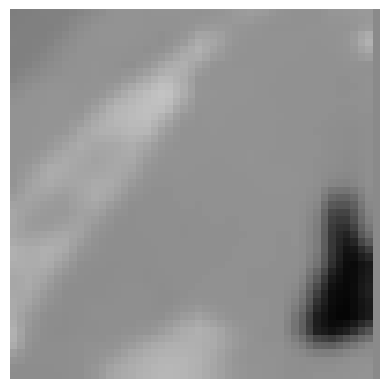

In [10]:
displayImageSlice(cropped_image, 25)

In [8]:
cropped_image, cropped_mask = crop_with_pyradiomics(image, mask, 1)

In [10]:
cropped_mask.GetSize()

(22, 28, 14)